# Airline On-Time and Delay Causes
## by Alhassan Atama Isiaka

## Preliminary Wrangling

> The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end.
This data contains the the dataset of 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Loading the dataset into dataframe df

In [226]:
df = pd.read_csv('1987.csv.bz2', compression='bz2')

In [22]:
airports = pd.read_csv("airports.csv")

In [23]:
carriers = pd.read_csv("carriers.csv")

In [227]:
print("The dataset is made of the structure below\n ")
df.info()

The dataset is made of the structure below
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   FlightNum          1311826 non-null  int64  
 10  TailNum            0 non-null        float64
 11  ActualElapsedTime  1288326 non-null  float64
 12  CRSElapsedTime     1311826 non-null  int64  
 13  AirTime            0 non-null        float64
 14  ArrDelay           1288326 non-null  

### What is/are the main feature(s) of interest in your dataset?
>I am interested in the causes of long flight delays?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
>Departure Delay and Arrival delay will help my investigation
Distance
5 other delay factors given in the dataset
are WeatherDelay, NAS Delay, SecurityDelay, LateAircraftDelay. But for 1987 data, the fields are NaN so we dropped them

In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1311826.0,1.311826e+06,1.311826e+06,1.311826e+06,1.292141e+06,1.311826e+06,1.288326e+06,1.311826e+06,1.311826e+06,0.0,...,0.0,0.0,1.311826e+06,0.0,1.311826e+06,0.0,0.0,0.0,0.0,0.0
mean,1987.0,1.099374e+01,1.571761e+01,3.949043e+00,1.369276e+03,1.361131e+03,1.493152e+03,1.491052e+03,6.701427e+02,NaN,...,NaN,NaN,1.500580e-02,NaN,2.908160e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,8.232012e-01,8.835640e+00,1.986290e+00,4.787183e+02,4.719701e+02,4.987503e+02,4.868002e+02,5.145510e+02,NaN,...,NaN,NaN,1.215756e-01,NaN,5.384891e-02,NaN,NaN,NaN,NaN,NaN
min,1987.0,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1987.0,1.000000e+01,8.000000e+00,2.000000e+00,9.460000e+02,9.400000e+02,1.117000e+03,1.115000e+03,2.910000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1987.0,1.100000e+01,1.600000e+01,4.000000e+00,1.345000e+03,1.338000e+03,1.521000e+03,1.519000e+03,5.600000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1987.0,1.200000e+01,2.300000e+01,6.000000e+00,1.750000e+03,1.742000e+03,1.918000e+03,1.912000e+03,8.940000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1987.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,6.282000e+03,NaN,...,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [13]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987
Month,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
DayofMonth,14,15,17,18,19,21,22,23,24,25,26,28,29,31,1,2,3,4,5,6
DayOfWeek,3,4,6,7,1,3,4,5,6,7,1,3,4,6,4,5,6,7,1,2
DepTime,741,729,741,729,749,728,728,731,744,729,735,741,742,726,936,918,928,914,1042,934
CRSDepTime,730,730,730,730,730,730,730,730,730,730,730,725,725,725,915,915,915,915,915,915
ArrTime,912,903,918,847,922,848,852,902,908,851,904,919,906,848,1035,1017,1037,1003,1129,1024
CRSArrTime,849,849,849,849,849,849,849,849,849,849,849,855,855,855,1001,1001,1001,1001,1001,1001
UniqueCarrier,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
FlightNum,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451


In [228]:
#dropping columns we are not going to use since our focus is going to be on delay
df = df.drop(['FlightNum','TailNum','AirTime','TaxiIn','TaxiOut','Cancelled','CarrierDelay', 'CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],1)

In [167]:
# delete duplicated rows  
print(df.duplicated().sum())
df = df.drop_duplicates()

59


In [214]:
df.AirTime.sum()

0.0

In [104]:
#Drop null and zero values from arrival and departure delays
df = df[df['ArrDelay'].isnull() == False]
df = df[df['DepDelay'].isnull() == False]
df[['ArrDelay', 'DepDelay']] = df[['ArrDelay', 'DepDelay']].replace(0, np.NAN)
df.dropna(inplace = True)

## Univariate Exploration

### Distribution of arrival delays
The histogram shows the distribution of the delay. We take the range from -50 to 100 minutes

Text(0.5, 0, 'Arrival Delay (min)')

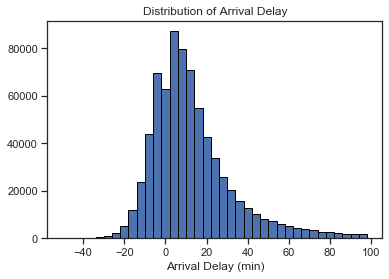

In [175]:
bin = np.arange(-50, 100, 4)
plt.hist(data=df, x="ArrDelay", bins=bin, ec='black')
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (min)")

Text(0.5, 0, 'Departure Time')

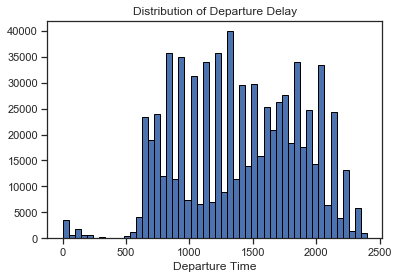

In [189]:
plt.hist(data=df, x="DepTime", bins=50, ec='black')
plt.title("Distribution of Departure Delay")
plt.xlabel("Departure Time")

### Distance

Text(0.5, 0, 'Distances')

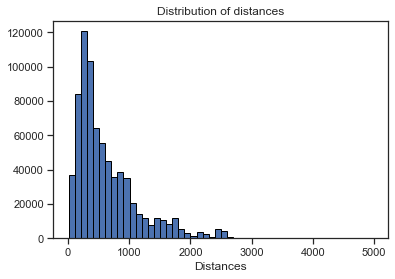

In [202]:
plt.hist(data=df, x="Distance", bins=50, ec='black')
plt.title("Distribution of distances")
plt.xlabel("Distances")

>The distribution arrival delay was a little right-skewed and the mode is around 0 minute. It revealed that many flight actually arrives ahead of scheduled time. This could be investigated further by breaking down into 2 portions, Departure delay and Elapsed time delay.

<li>The distribution of the Departure delay has mode around 0 minute.</li>

<li>From the arrival time histogram we can see that earlier arrival is more associated with shorter flight time. I could not perform analysis on other delay factors for this dataset because the values are null so I removed the columns.</li>
<li>We hope to get more insights from the bivariate exploration </li>


## Bivariate Exploration

We will look at pairwise analysis between two variables, arrivals and departure delays. 

In [56]:
carriers.values

array([['02Q', 'Titan Airways'],
       ['04Q', 'Tradewind Aviation'],
       ['05Q', 'Comlux Aviation, AG'],
       ...,
       ['ZX (1)', 'Airbc Ltd.'],
       ['ZY', 'Atlantic Gulf Airlines'],
       ['ZYZ', 'Skyway Aviation Inc.']], dtype=object)

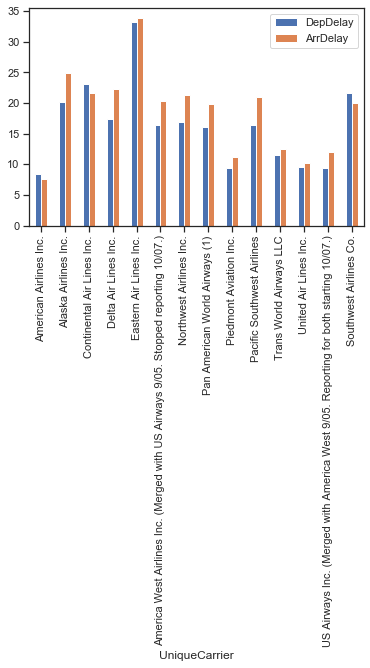

In [166]:
carrier_pair = dict(carriers.values)
ax = df.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}) \
            .rename(index=carrier_pair).plot.bar(subplots=False)
plt.show()

We can also see the correlation between arrival and departure delays on a scatter plot

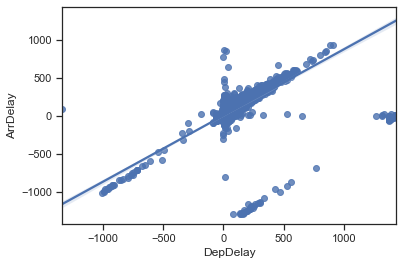

In [204]:
sns.regplot(data=df, x='DepDelay', y='ArrDelay')
plt.show()

In [210]:
# The extremely high values  should be paid more attention. These can be outliers.
df[ df.Distance > 3500].sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,CRSDepHour
432329,1987,10,15,4,112.0,100,453.0,440,CO,461.0,460,13.0,12.0,HNL,GUM,3801.0,"(0, 100]"
37716,1987,10,27,2,1304.0,1300,1726.0,1750,UA,502.0,530,-24.0,4.0,ORD,OGG,4184.0,"(1200, 1300]"
339119,1987,10,28,3,1754.0,1755,601.0,554,AA,487.0,479,7.0,-1.0,HNL,ORD,4243.0,"(1700, 1800]"
37351,1987,10,24,6,1051.0,1030,1422.0,1416,UA,511.0,526,6.0,21.0,ORD,HNL,4243.0,"(1000, 1100]"
765894,1987,11,27,5,2027.0,2029,751.0,735,AA,444.0,426,16.0,-2.0,HNL,DFW,3784.0,"(2000, 2100]"


In [92]:
#outliers in ArrDelay and DepDelay
outliers = (((df.DepDelay - df.DepDelay.mean()).abs() > df.DepDelay.std()*3) | 
            ((df.ArrDelay - df.ArrDelay.mean()).abs() > df.ArrDelay.std()*3))

/Users/alhassan.isiaka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


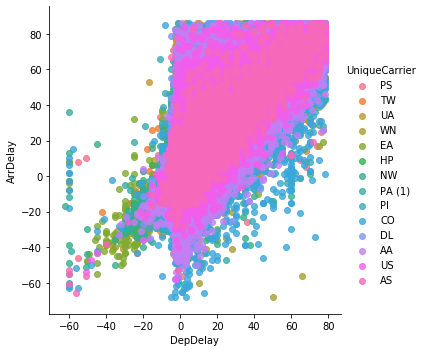

In [98]:
sns.lmplot('DepDelay', 'ArrDelay', data=df[~outliers],
           fit_reg=False, hue='UniqueCarrier')
plt.show()

In [ ]:
Delays Grouped by Month

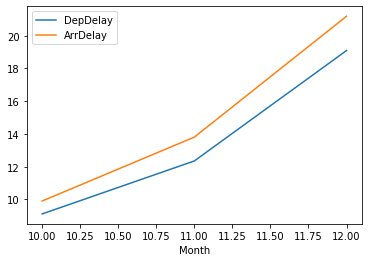

In [110]:
df.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.show()

### Get best time of the day to travel
let's create a dataframe of time in hours

In [113]:
df['CRSDepHour'] = pd.cut(df.CRSDepTime, list(range(0, 2500, 100)))

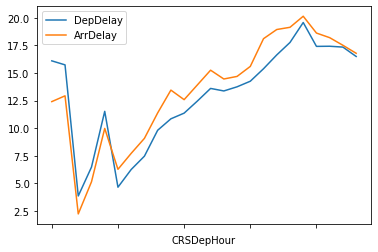

In [121]:
df.groupby('CRSDepHour').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.show()

From the chat above, we see that the delay increases during evening periods

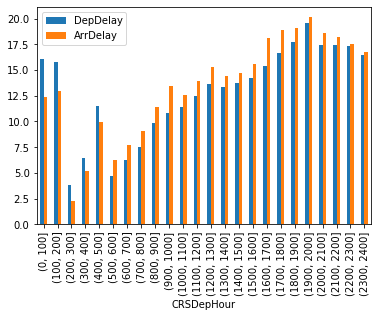

In [122]:
df.groupby('CRSDepHour').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar()
plt.show()

Let's look at the relationship between distance to both arrival and departure delay

<Figure size 1152x432 with 0 Axes>

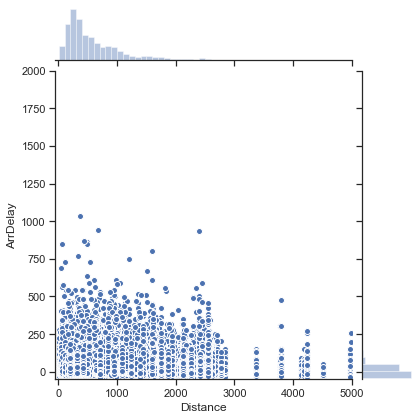

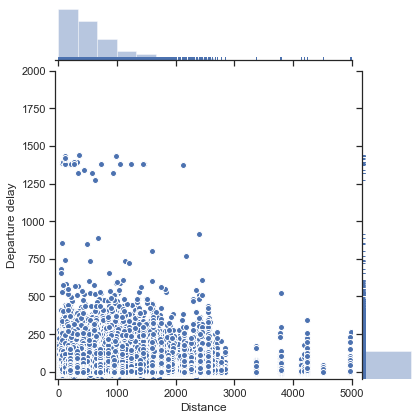

In [229]:
plt.figure(figsize=[16,6])
sns.jointplot(data=df, x="Distance", y="ArrDelay",
             annot_kws=dict(stat="r"), edgecolor="w", xlim=([-50,5000]), linewidth=1, ylim=([-50,2000]))
sns.set(style="ticks", color_codes=True)

jp = sns.jointplot(data=df, x="Distance", y="DepDelay", marginal_kws=dict(bins=15, rug=True),
                  annot_kws=dict(stat="r"), edgecolor="w", xlim=([-50,5000]), linewidth=1, ylim=([-50,2000]))
jp.set_axis_labels("Distance", "Departure delay")
jp.ylim=([-50,100])

From the chart above, locations with higher distance tend to have lower delay relatively to locations that are not far

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

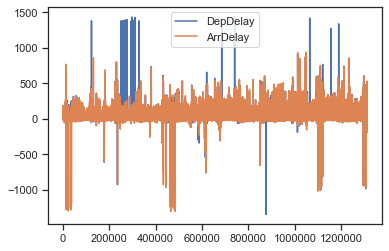

In [164]:
df.loc[:,['DepDelay', 'ArrDelay']].plot.line()

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   ActualElapsedTime  1288326 non-null  float64
 10  CRSElapsedTime     1311826 non-null  int64  
 11  ArrDelay           1288326 non-null  float64
 12  DepDelay           1292141 non-null  float64
 13  Origin             1311826 non-null  object 
 14  Dest               1311826 non-null  object 
 15  Distance           1310811 non-n

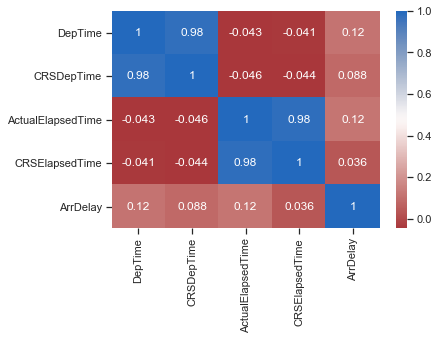

In [225]:
# correlation plot
numeric_cols = ['DepTime', 'CRSDepTime','ActualElapsedTime','CRSElapsedTime','ArrDelay']
#plt.figure(figsize=[12,6])
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="vlag_r");

### Multivariate Exploration
This part includes dead-end exploration since a lot of those variables contains null values. We stick to the Univariate and Bivariate exploration